In [1]:
from MFEA_lib.model import SMP_MFEA
from MFEA_lib.model.utils import *
from MFEA_lib.operators.Crossover import *
from MFEA_lib.operators.Mutation import *
from MFEA_lib.operators.Selection import *
from MFEA_lib.operators.Search import *
from MFEA_lib.tasks.Benchmark.Competitions import CEC17_benchmark, GECCO20_benchmark_50tasks, WCCI22_benchmark


#### Benchmark

In [ ]:
# complex
ls_benchmark = []
ls_IndClass = []
name_benchmark = []
path = './RESULTS/result/WCCI22_complex/SMP_v2/'

for i in range(1, 11, 1):
# for i in [3, 6, 8, 10]:
    t, ic = WCCI22_benchmark.get_complex_benchmark(i)
    ls_benchmark.append(t)
    ls_IndClass.append(ic)
    name_benchmark.append(i)


In [2]:
# cec17
t, ic = CEC17_benchmark.get_10tasks_benchmark()

ls_benchmark = [t]
ls_IndClass = [ic]
name_benchmark = ["cec17"]
path = './RESULTS/result/CEC17/SMP_v2/'

In [2]:
# gecco20
ls_benchmark = []
ls_IndClass = []
name_benchmark = []
path = './RESULTS/result/GECCO20/SMP_v2/'

for i in range(1, 11, 1):
    t, ic = WCCI22_benchmark.get_50tasks_benchmark(i)
    ls_benchmark.append(t)
    ls_IndClass.append(ic)
    name_benchmark.append(i)

##### Code đơn

In [3]:
smpModel = MultiBenchmark(
    ls_benchmark= ls_benchmark,
    name_benchmark= name_benchmark,
    ls_IndClass= ls_IndClass,
    model= SMP_MFEA
)
smpModel.compile( 
    crossover = KL_SBXCrossover(nc= 2, k= 7),
    # crossover = SBX_Crossover(nc = 2),
    mutation = PolynomialMutation(nm = 5, pm= 1),
    selection= ElitismSelection(random_percent= 0.),
    search= L_SHADE(len_mem= 15),
    attr_tasks = ['crossover', 'mutation', 'search'],
)
smpModel.fit(
    nb_generations= 1000, nb_inds_each_task= 100, nb_inds_min= 30,
    lr = 0.1, p_const_intra= 0., prob_search = 0., lc_nums = 200,
    nb_epochs_stop= 1000, swap_po= False,
    evaluate_initial_skillFactor= True
)
a = smpModel.run(
    nb_run= 30,     
    save_path= path
)


Time: 01m 22.74s  100 % [====================>]  Pop_size: 2.90E+02  ,  Cost: 4.10E-26  2.50E-26  0.00E+00  0.00E+00  7.82E-22  4.31E-14  0.00E+00  6.36E-04  0.00E+00  0.00E+00  ,  
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[100016, 100192, 100480, 100264, 100042, 99774, 99346, 99790, 100252, 99984]
END!
Time: 01m 4.99s  100 % [====================>]  Pop_size: 2.90E+02  ,  Cost: 3.76E-26  2.34E-26  0.00E+00  0.00E+00  4.93E-24  4.31E-14  0.00E+00  6.36E-04  0.00E+00  0.00E+00  ,  
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[100032, 100504, 100158, 99494, 100658, 100310, 99762, 99872, 99822, 99528]
END!
Time: 00m 22.74s   30 % [======>             ]  Pop_size: 7.90E+02  ,  Cost: 5.14E-02  2.74E-03  1.64E-06  4.42E-04  6.20E+00  1.56E-02  2.87E-02  1.22E-01  5.85E-06  1.16E-01  ,  

##### Run complex, gecco

In [2]:
# complex
ls_benchmark = []
ls_IndClass = []
name_benchmark = []
path = './RESULTS/result/WCCI22_complex/SMP_v2/'

for i in range(1, 11, 1):
# for i in [3, 6, 10]:
    t, ic = WCCI22_benchmark.get_complex_benchmark(i)
    ls_benchmark.append(t)
    ls_IndClass.append(ic)
    name_benchmark.append(i)

smpModel = MultiBenchmark(
    ls_benchmark= ls_benchmark,
    name_benchmark= name_benchmark,
    ls_IndClass= ls_IndClass,
    model= SMP_MFEA
)

smpModel.compile( 
    # crossover= newSBX(nc = 2, gamma= 0.4, alpha = 6),
    crossover = KL_SBX(nc= 2, k= 7),
    # crossover = SBX_Crossover(nc = 2),
    mutation = PolynomialMutation(nm = 5, pm= 1),
    selection= ElitismSelection(random_percent= 0.),
    search= L_SHADE(len_mem= 15),
    attr_tasks = ['crossover', 'mutation', 'search'],
)
smpModel.fit(
    nb_generations= 1000, nb_inds_each_task= 100, nb_inds_min= 30,
    lr = 0.1, p_const_intra= 0., prob_search = 0.4, 
    # lc_nums = 200,
    nb_epochs_stop= 1000, swap_po= False,
    evaluate_initial_skillFactor= True
)

a = smpModel.run(
    nb_run= 5,
    save_path= path
)


Time: 01m 14.43s  100 % [====================>]  Pop_size: 6.00E+01  ,  Cost: 6.03E+02  6.03E+02  ,  
[0.5 0.5]
[100956. 100986.]
END!
Time: 01m 7.95s  100 % [====================>]  Pop_size: 6.00E+01  ,  Cost: 6.04E+02  6.04E+02  ,  
[0.5 0.5]
[101309. 100644.]
END!
Time: 01m 10.09s  100 % [====================>]  Pop_size: 6.00E+01  ,  Cost: 6.03E+02  6.04E+02  ,  
[0.5 0.5]
[101285. 100643.]
END!
Time: 01m 17.65s  100 % [====================>]  Pop_size: 6.00E+01  ,  Cost: 6.03E+02  6.03E+02  ,  
[0.5 0.5]
[101417. 100512.]
END!
Time: 01m 31.40s  100 % [====================>]  Pop_size: 6.00E+01  ,  Cost: 6.02E+02  6.03E+02  ,  
[0.5 0.5]
[100851. 101081.]
END!
DONE!
Saved
Time: 01m 15.12s  100 % [====================>]  Pop_size: 6.00E+01  ,  Cost: 7.00E+02  7.00E+02  ,  
[0.5 0.5]
[100648. 101282.]
END!
Time: 01m 4.09s  100 % [====================>]  Pop_size: 6.00E+01  ,  Cost: 7.00E+02  7.00E+02  ,  
[0.5 0.5]
[100685. 101232.]
END!
Time: 01m 6.47s  100 % [====================>

In [3]:
# gecco20
ls_benchmark = []
ls_IndClass = []
name_benchmark = []
path = './RESULTS/result/GECCO20/SMP_v2/'

for i in range(1, 11, 1):
    t, ic = WCCI22_benchmark.get_50tasks_benchmark(i)
    ls_benchmark.append(t)
    ls_IndClass.append(ic)
    name_benchmark.append(i)

smpModel = MultiBenchmark(
    ls_benchmark= ls_benchmark,
    name_benchmark= name_benchmark,
    ls_IndClass= ls_IndClass,
    model= SMP_MFEA
)

smpModel.compile( 
    # crossover= newSBX(nc = 2, gamma= 0.4, alpha = 6),
    crossover = KL_SBX(nc= 2, k= 7),
    # crossover = SBX_Crossover(nc = 2),
    mutation = PolynomialMutation(nm = 5, pm= 1),
    selection= ElitismSelection(random_percent= 0.),
    search= L_SHADE(len_mem= 15),
    attr_tasks = ['crossover', 'mutation', 'search'],
)
smpModel.fit(
    nb_generations= 1000, nb_inds_each_task= 100, nb_inds_min= 30,
    lr = 0.1, p_const_intra= 0., prob_search = 0.4, lc_nums = 200,
    nb_epochs_stop= 1000, swap_po= False,
    evaluate_initial_skillFactor= True
)

a = smpModel.run(
    nb_run= 1,
    save_path= path
)


Time: 21m 35.07s  100 % [====================>]  Pop_size: 1.50E+03  ,  Cost: 2.04E-27  2.44E-27  2.26E-27  2.14E-27  1.08E-27  2.19E-27  2.08E-27  2.04E-27  1.99E-27  1.99E-27  2.80E-27  1.63E-27  1.58E-27  2.61E-27  2.42E-27  2.08E-27  1.06E-27  1.55E-27  2.21E-27  1.55E-27  2.55E-27  2.54E-27  2.04E-27  1.44E-27  2.81E-27  1.81E-27  1.61E-27  1.71E-27  2.18E-27  2.30E-27  1.80E-27  2.79E-27  2.48E-27  1.76E-27  1.91E-27  1.73E-27  2.14E-27  1.70E-27  1.29E-27  3.31E-27  1.86E-27  1.41E-27  1.85E-27  2.59E-27  1.84E-27  2.78E-27  2.56E-27  1.80E-27  2.21E-27  2.06E-27  ,  
[0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02]
[101025. 101021. 101034. 100836. 100825. 100722. 100930. 101189. 101752.
 100670. 101468. 100761. 100802. 101288. 100383. 101176. 101007. 101480.
  99854. 100573. 

##### Complex

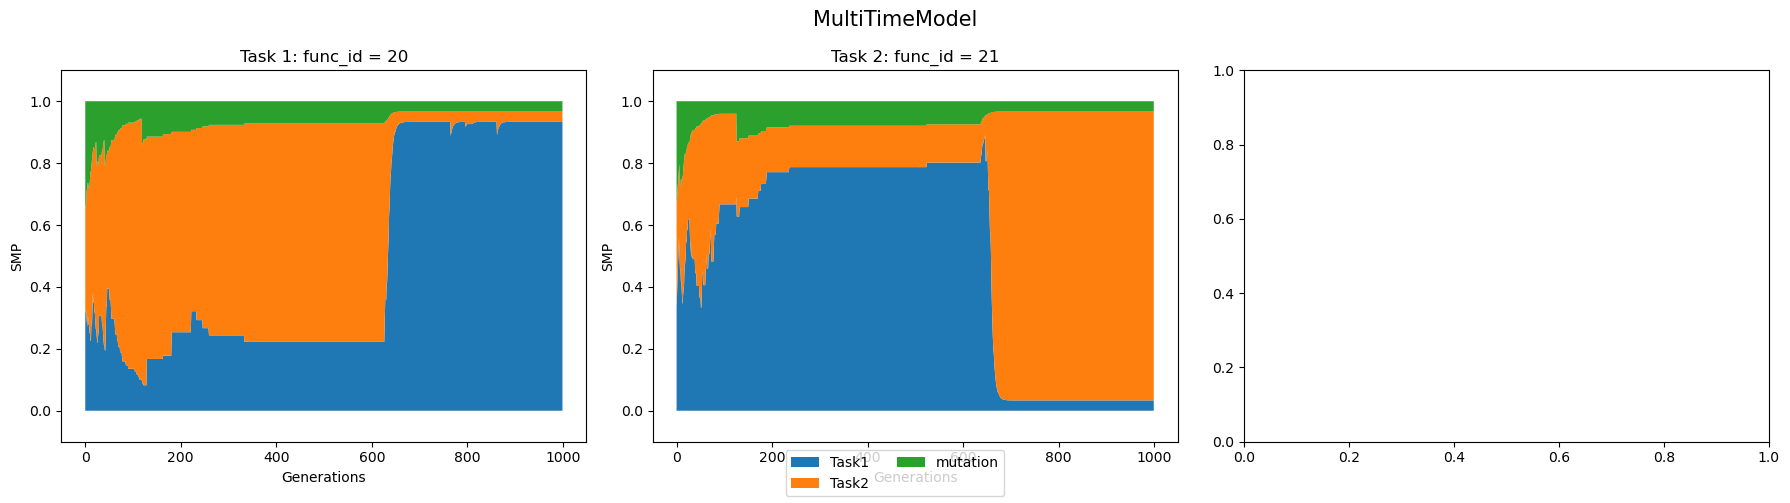

In [4]:
SMP_v2 = loadModel('./RESULTS/result/WCCI22_complex/SMP_v2/8.mso', ls_tasks= t)
SMP_v2.render_smp()

In [5]:
# complex
ls_benchmark = []
ls_IndClass = []
name_benchmark = []
path = './RESULTS/result/WCCI22_complex/SMP_v2/'

for i in range(1, 11, 1):
# for i in [3, 6, 10]:
    t, ic = WCCI22_benchmark.get_complex_benchmark(i)
    ls_benchmark.append(t)
    ls_IndClass.append(ic)
    name_benchmark.append(i)
    
compare = CompareResultBenchmark(
    path_folder="./RESULTS/result/WCCI22_complex", 
    ls_benchmark= ls_benchmark
)
compare.load_folder()

(0 : LSA_COMPLEX)
(1 : LSA_21)
(2 : MFEA_COMPLEX)
(3 : MFEA1_COMPLEX)
(4 : SMP_COMPLEX_FINAL_CEC10)
(5 : SMP_v2)
(0 : LSA_COMPLEX)
(1 : LSA_21)
(2 : MFEA_COMPLEX)
(3 : MFEA1_COMPLEX)
(4 : SMP_COMPLEX_FINAL_CEC10)
(5 : SMP_v2)


In [6]:
compare.summarizing_compare_result(idx_main_algo= 5, min_value= 1e-6)

Better  Equal  Worse
SMP_v2 vs LSA_COMPLEX                  19      0      1
SMP_v2 vs LSA_21                       12      0      8
SMP_v2 vs MFEA_COMPLEX                 20      0      0
SMP_v2 vs MFEA1_COMPLEX                20      0      0
SMP_v2 vs SMP_COMPLEX_FINAL_CEC10      20      0      0

In [7]:
compare.show_compare_detail(idx_main_algo=0)

Benchmark:  1
               LSA_COMPLEX             LSA_21       MFEA_COMPLEX      MFEA1_COMPLEX SMP_COMPLEX_FINAL_CEC10                SMP_v2
Tasks1   612.7801631385278  608.0086430666668  641.2352856497579   608.908779636078       621.3871000886592  (+)602.9922160072068
Tasks2   621.3176276249004  607.8913740333334  641.3703910199642  608.9714738198566        621.362117720952  (+)602.6230029709554
Compare                0/2                0/2                0/2                0/2                     0/2                   2/2

Benchmark:  2
               LSA_COMPLEX             LSA_21       MFEA_COMPLEX      MFEA1_COMPLEX SMP_COMPLEX_FINAL_CEC10                SMP_v2
Tasks1   700.0000000010339        700.0025424   700.002784505369  700.0063009450764       700.0010681802964  (+)700.0000000000003
Tasks2   700.0073960406381  700.0032844333333  700.0012369534385  700.0058490107581       700.0000000003308  (+)700.0000000000002
Compare                0/2                0/2                

##### cec17

In [4]:
SMP_v2 = loadModel('./RESULTS/result/CEC17/SMP_v2/cec17.mso', ls_tasks= t)

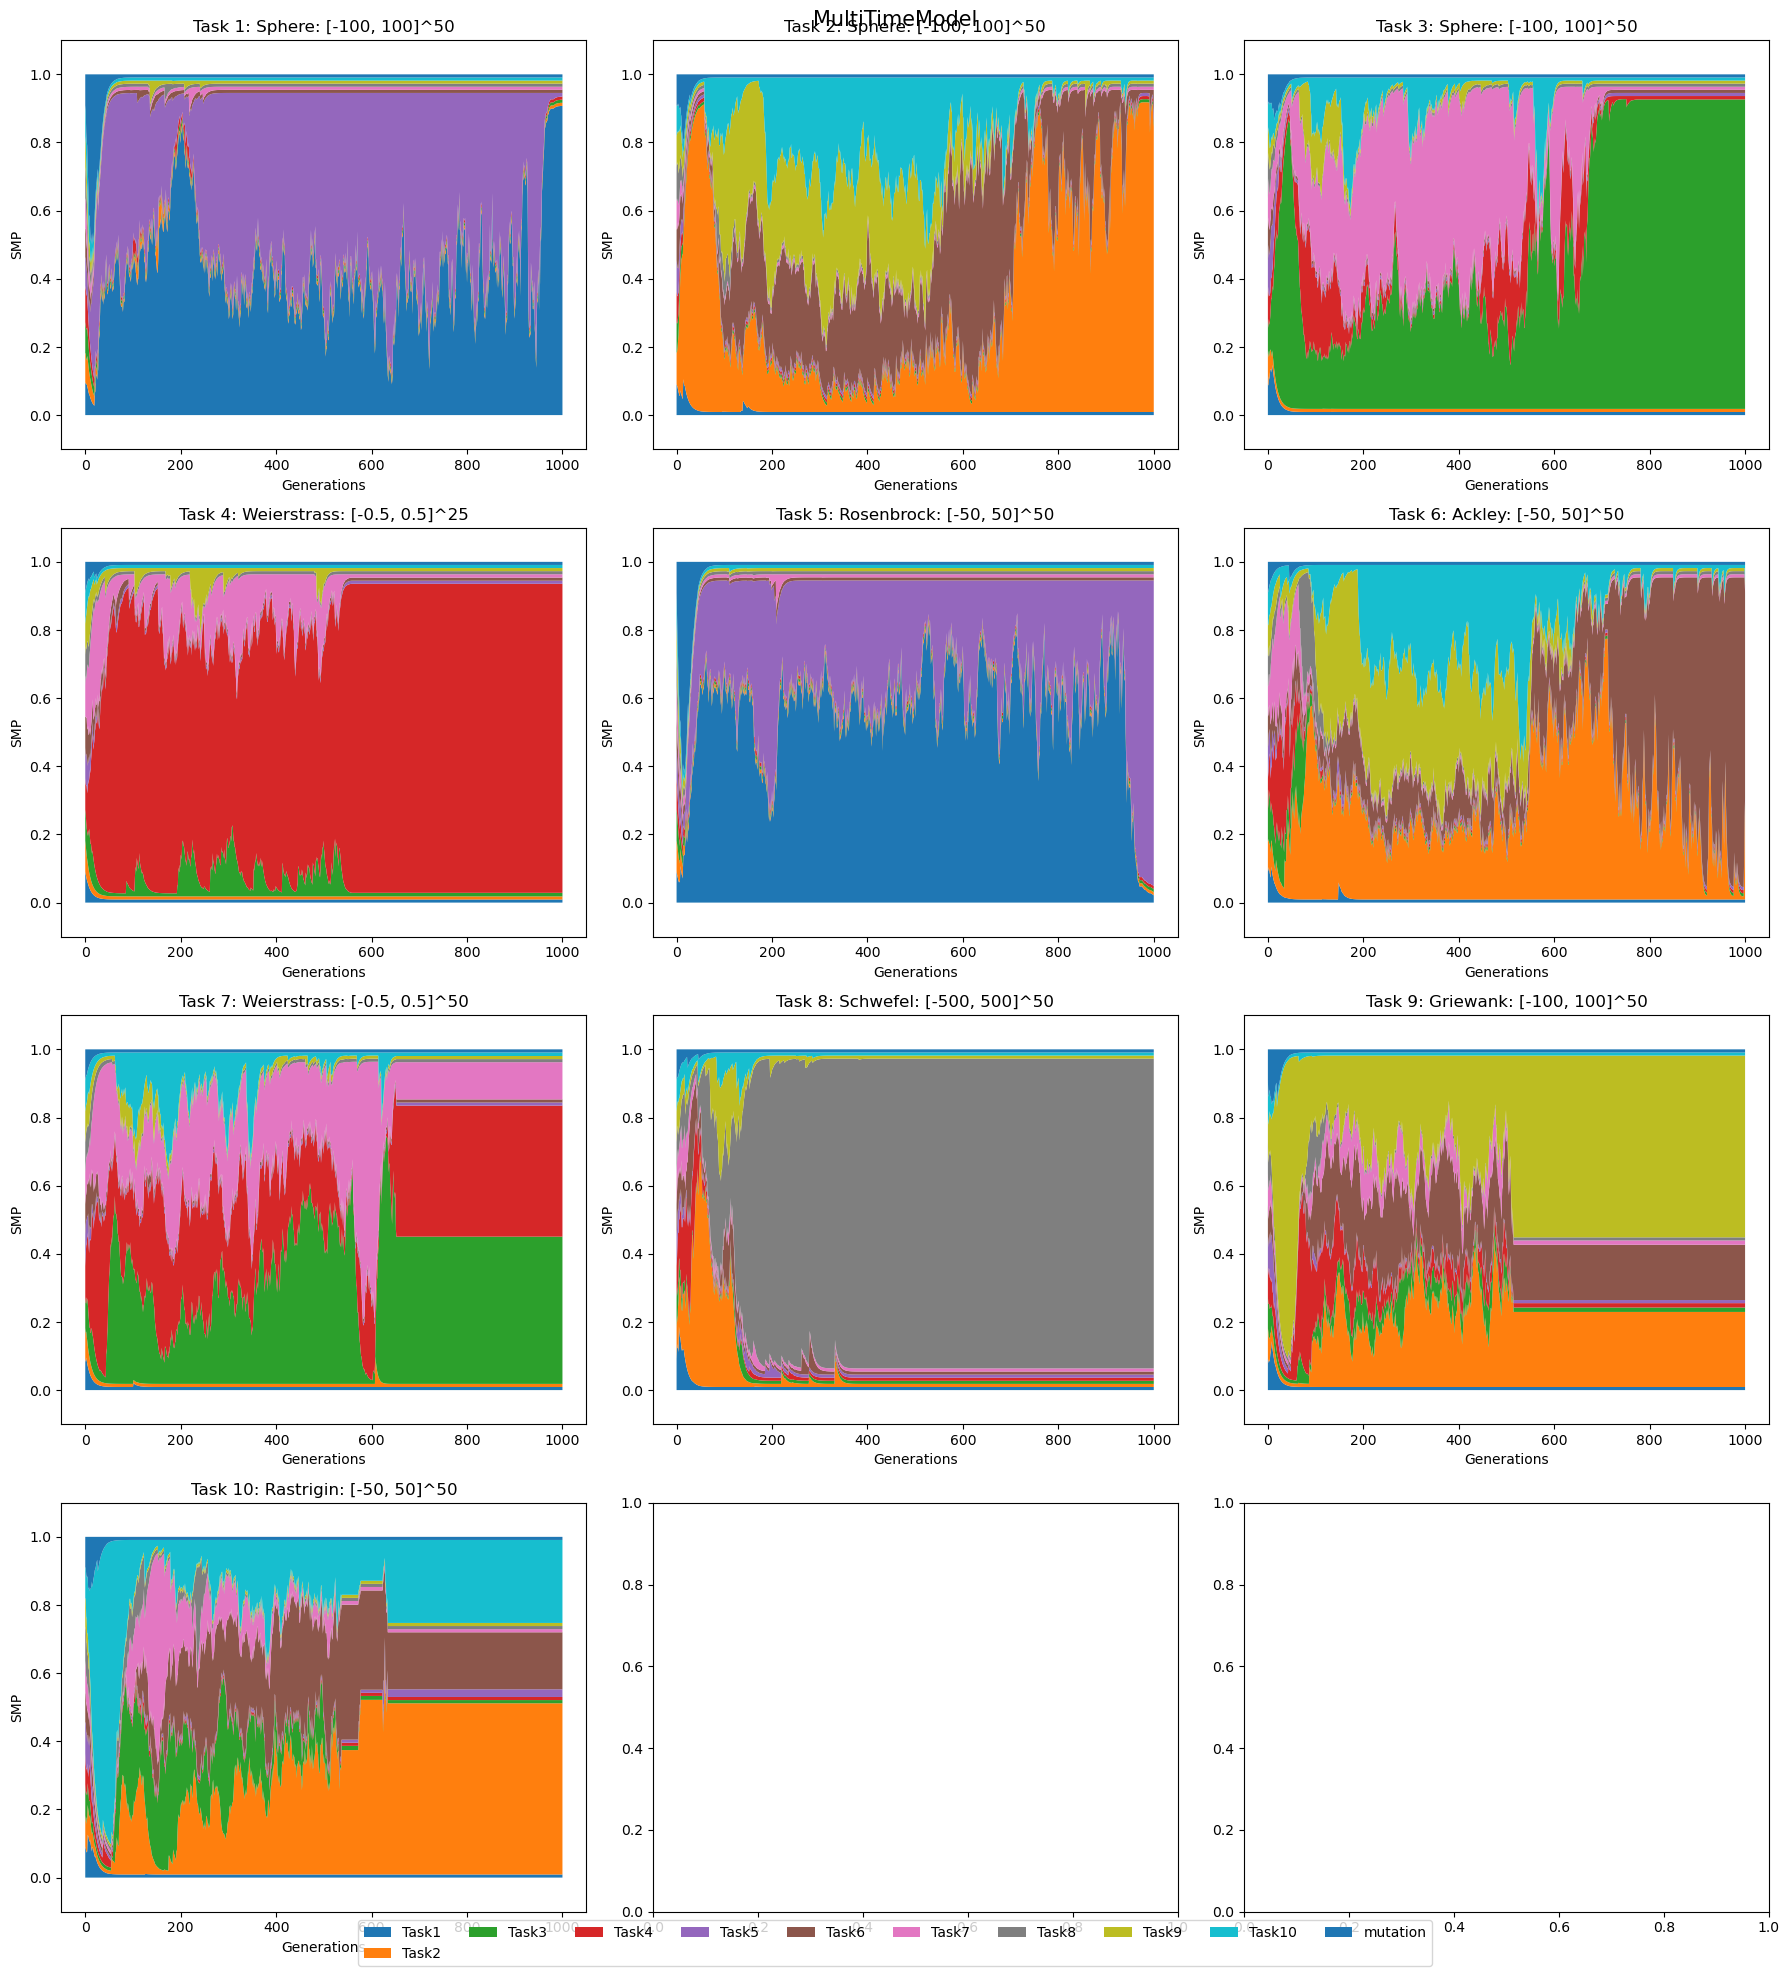

In [5]:
SMP_v2.render_smp()

findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeThreeSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFourSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFiveSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found

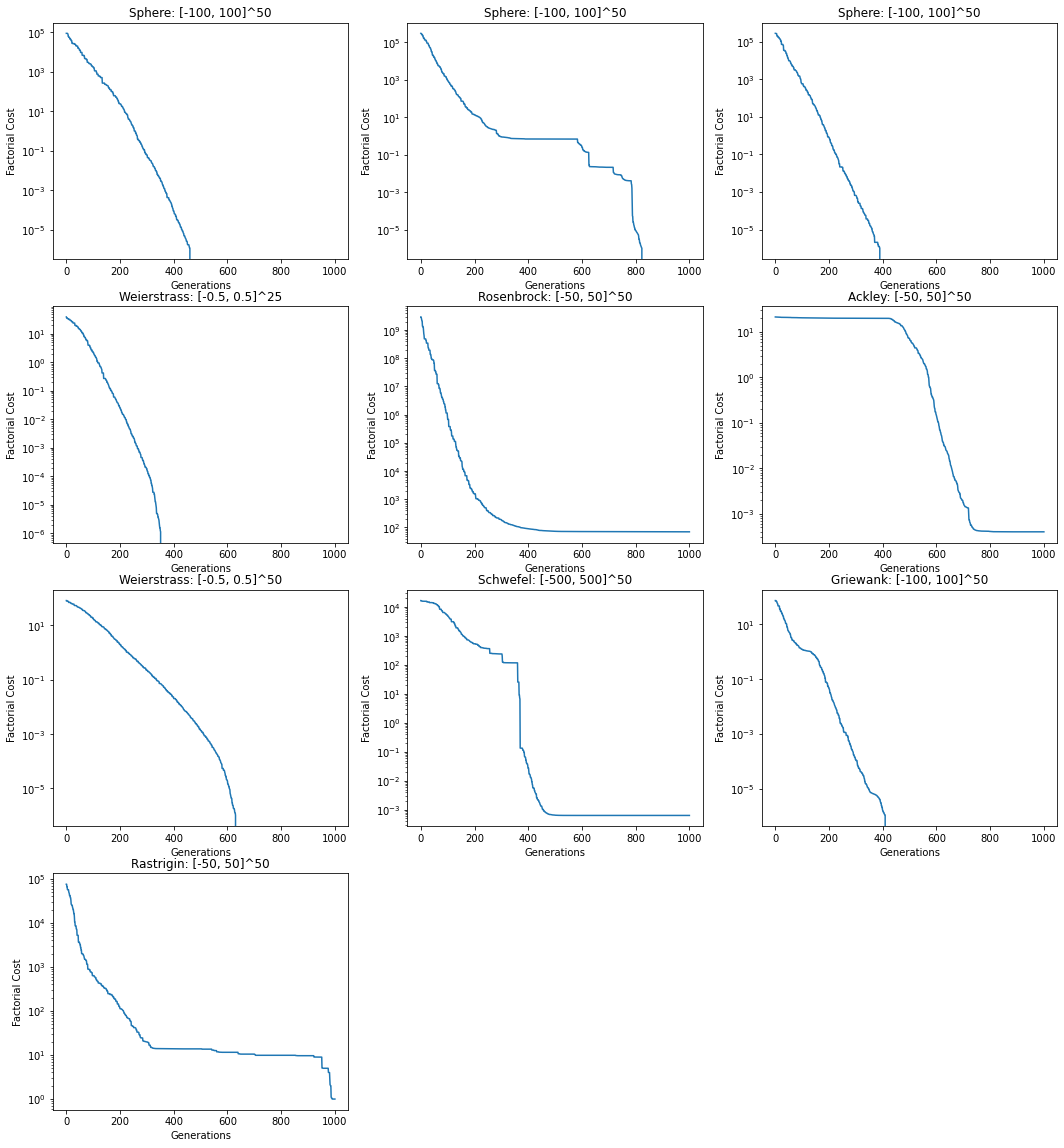

In [7]:
SMP_v2.render_history(yscale='log')

In [4]:
t, ic = CEC17_benchmark.get_10tasks_benchmark()

MFEA_model = loadModel('./RESULTS/__static__/CEC17_10tasks/MFEA_cec17.mso', ls_tasks= t)
EBS_GA_model = loadModel('./RESULTS/__static__/CEC17_10tasks/EBS_GA_cec17.mso', ls_tasks= t)
MaTDE_model = loadModel('./RESULTS/__static__/CEC17_10tasks/MaTDE_cec17.mso', ls_tasks= t)
MaTGA_model = loadModel('./RESULTS/__static__/CEC17_10tasks/MaTGA_cec17.mso', ls_tasks= t)
MTEA_AD_model = loadModel('./RESULTS/__static__/CEC17_10tasks/MTEA_AD_cec17.mso', ls_tasks= t)
SA_model = loadModel('./RESULTS/__static__/CEC17_10tasks/SA_cec17.mso', ls_tasks= t)
LSA_model = loadModel('./RESULTS/__static__/CEC17_10tasks/LSA_cec17.mso', ls_tasks= t)
SMP_newSBX = loadModel('./RESULTS/__static__/CEC17_10tasks/SMP_NEWSBX.mso', ls_tasks= t)
SMP_v2 = loadModel('./RESULTS/result/CEC17/SMP_v2/cec17.mso', ls_tasks= t)

compare = CompareModel(
    models = [MFEA_model, EBS_GA_model, MaTDE_model, MaTGA_model, MTEA_AD_model, SA_model, LSA_model, SMP_newSBX, SMP_v2],
    label= [...] * 7 + ['SMP_newSBX', 'SMP_v2'],
)
compare.render(    
    shape = (2, 5),
    min_cost= 0,
    step= 100,
    yscale= 'log'
)

# SMP_newSBX.render_smp(shape= (3, 5), step = 1)
SMP_v2.render_smp(shape= (2, 5), step = 1)
print()

ModuleNotFoundError: No module named 'MFEA_lib.tasks.function'

30 times

In [ ]:
# smpModel = MultiTimeModel(model= SMP_MFEA)
# smpModel.compile(
#     tasks= cec17_10tasks,
#     crossover= newSBX(nc = 2, gamma= 0.4, alpha = 6),
#     # mutation= NoMutation(),
#     mutation = GMMScale(alpha = 3, lenMem= 20, default_scale= 0.5),
#     selection= ElitismSelection(random_percent= 0.),
# )
# smpModel.fit(
#     nb_generations= 10, nb_inds_each_task= 100, nb_inds_min= 20,
#     lr = 1.5, p_const_intra= 0.3, p_mutate= 0.,
#     nb_epochs_stop= 50, 
#     evaluate_initial_skillFactor= True
# )
# smpModel.run(
#     nb_run= 30,
#     save_path= './RESULTS/smpMFEA_cec17.mso'
# )

In [ ]:
# smpModel.render_history(shape = (2, 5), yscale= 'log')
# print()

In [ ]:
# smpModel.render_smp(step = 1, get_host= True)
# print()

##### GECCO20

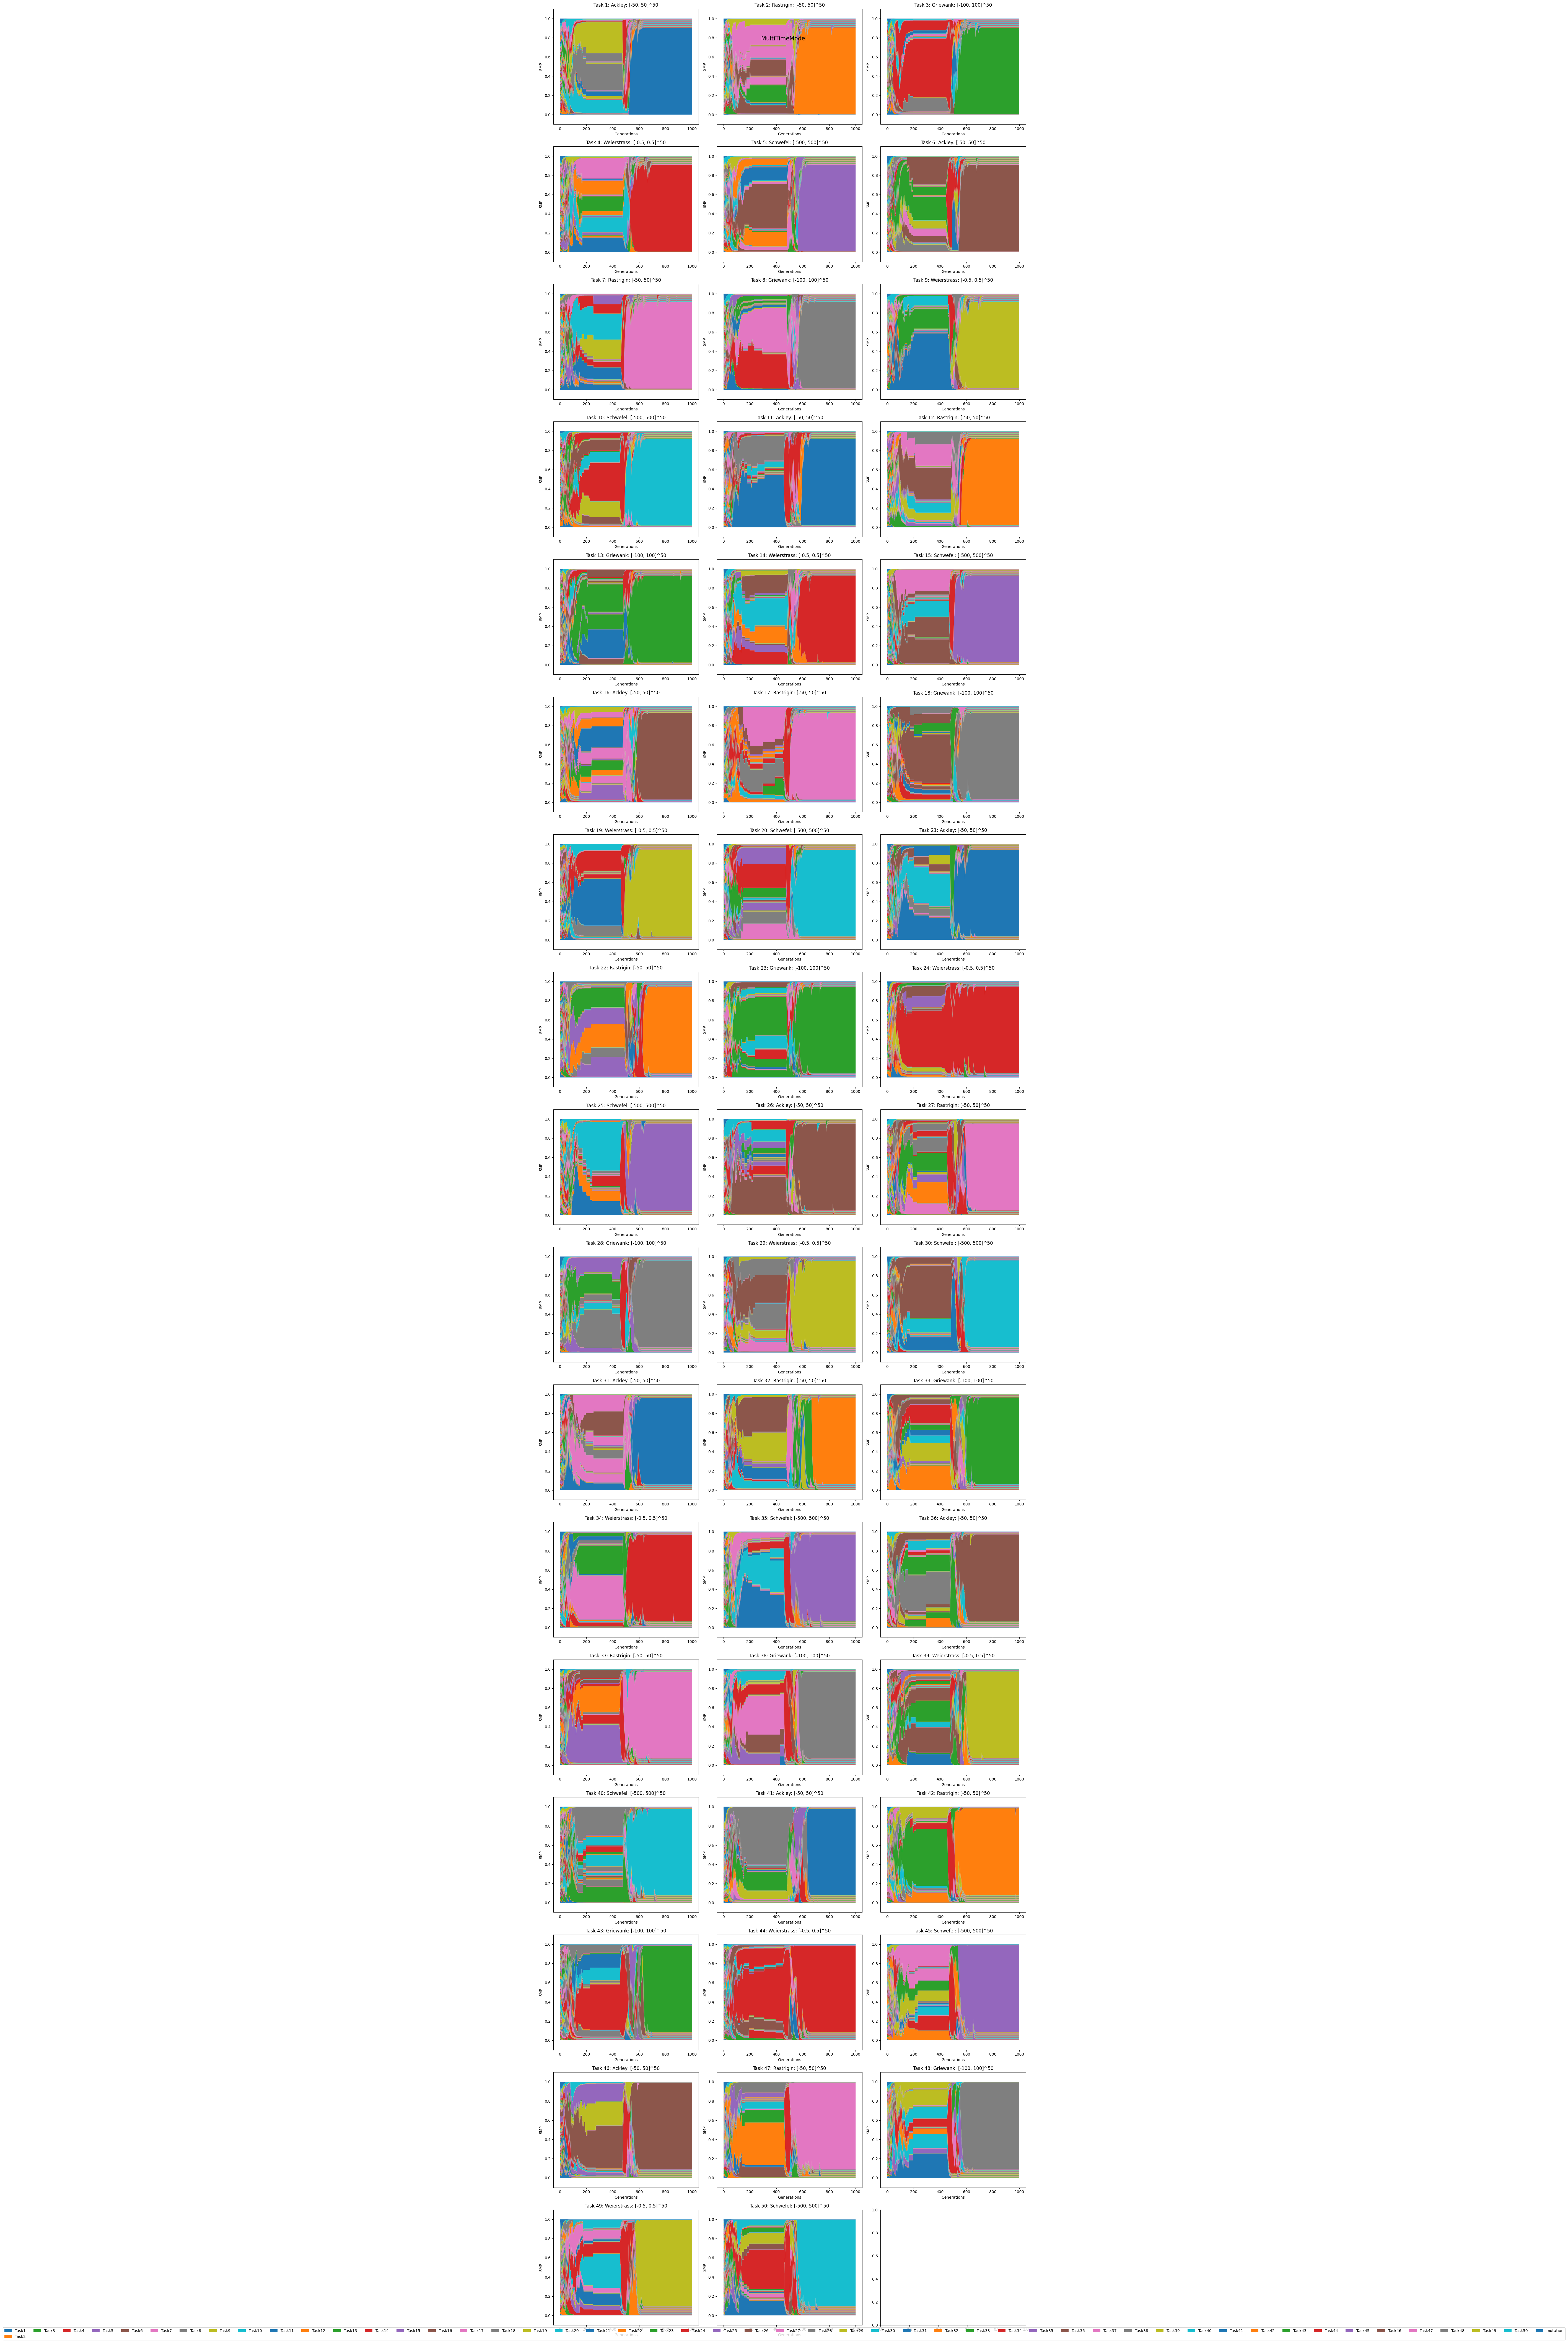

In [ ]:
SMP_v2 = loadModel('./RESULTS/result/GECCO20/SMP_v2/3.mso', ls_tasks= t)
SMP_v2.render_smp()

In [4]:
# gecco20
ls_benchmark = []
ls_IndClass = []
name_benchmark = []
path = './RESULTS/result/GECCO20/SMP_v2/'

for i in range(1, 11, 1):
    t, ic = WCCI22_benchmark.get_50tasks_benchmark(i)
    ls_benchmark.append(t)
    ls_IndClass.append(ic)
    name_benchmark.append(i)

In [5]:
compare = CompareResultBenchmark(
    path_folder="./RESULTS/result/GECCO20/", 
    ls_benchmark= ls_benchmark
)
compare.load_folder()

(0 : SBS_GA_poly)
(1 : SMP_alpha_beta_1)
(2 : SBS_GA)
(3 : MFEA)
(4 : LSA_2021)
(5 : EBS_GA)
(6 : SMP_v2)
(7 : SMP_15_5)
(0 : SBS_GA_poly)
(1 : SMP_alpha_beta_1)
(2 : SBS_GA)
(3 : MFEA)
(4 : LSA_2021)
(5 : EBS_GA)
(6 : SMP_v2)
(7 : SMP_15_5)


In [6]:
compare.summarizing_compare_result(idx_main_algo= 6, min_value= 1e-6)

Better  Equal  Worse
SMP_v2 vs SBS_GA_poly          251    128    121
SMP_v2 vs SMP_alpha_beta_1     310    103     87
SMP_v2 vs SBS_GA               385      0    115
SMP_v2 vs MFEA                 488      0     12
SMP_v2 vs LSA_2021             126     67    307
SMP_v2 vs EBS_GA               386      0    114
SMP_v2 vs SMP_15_5             200    120    180

In [7]:
compare.show_compare_detail(idx_main_algo=0, min_value= 1e-6)

Benchmark:  1
                       SBS_GA_poly           SMP_alpha_beta_1                  SBS_GA                MFEA LSA_2021                  EBS_GA                     SMP_v2                   SMP_15_5
Tasks1    (+)5.882689301802719e-17  (+)4.2122579748207416e-26  1.8984391916298324e-05  16.288013618479884   (+)0.0  1.0430804487308234e-05  (+)2.0431209518697513e-27    (+)2.83632059206948e-27
Tasks2    (+)4.843200798357875e-17  (+)2.5166262024331356e-26  1.9106014199924534e-05    16.5676385516495   (+)0.0  1.3539504844404152e-05  (+)2.4435180798927147e-27  (+)2.6959535695634384e-27
Tasks3     (+)6.10017625456379e-17  (+)2.3466666127943417e-26  1.7304267667595325e-05  16.216383616767548   (+)0.0  1.4127291329255025e-05  (+)2.2643529707051294e-27   (+)3.340359245426589e-27
Tasks4    (+)5.276877406922684e-17   (+)2.215727550532698e-26  1.6958124642338686e-05   17.67265189767982   (+)0.0  1.2778358360218192e-05  (+)2.1359857308177063e-27  (+)2.6455898755904814e-27
Tasks5    (+)6.108846